# Assignment- Advanced Regression

In [581]:
# importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
sns.set_style("darkgrid")

% config InlineBackend.figure_format = 'png'
% matplotlib inline


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from math import ceil
from scipy.stats import skew
from itertools import product, chain
from sklearn.preprocessing import StandardScaler


In [582]:
# reading the dataset
train = pd.read_csv("train.csv")

In [583]:
# Checking head
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [584]:
# checking the dataset
print(train.info())
print(train.shape)
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB96D8F160>,
      dtype=object)

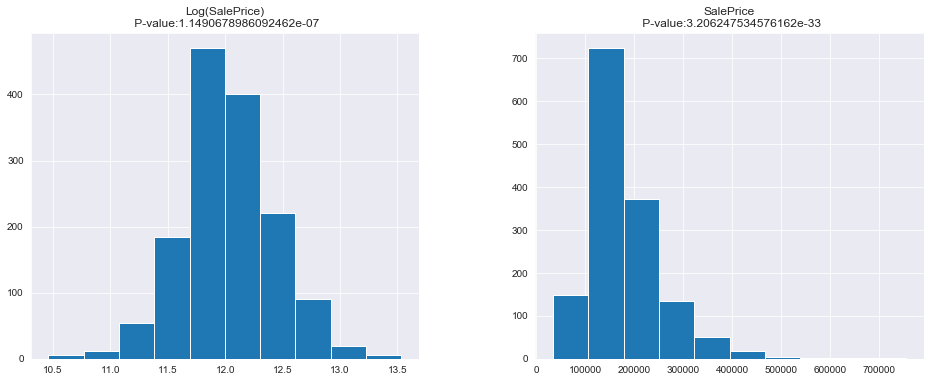

In [585]:
# Data Analysis

from scipy.stats import shapiro
# Check distribution of prices and log(prices)
plt.rcParams['figure.figsize'] = (16.0, 6.0)
# Greater the p-value, greater is the normality in the distribution
pvalue_before = shapiro(train["SalePrice"])[1]
pvalue_after = shapiro(np.log(train["SalePrice"]))[1]
graph_data = pd.DataFrame(
        {
            ("SalePrice\n P-value:" + str(pvalue_before)) : train["SalePrice"],
            ("Log(SalePrice)\n P-value:" + str(pvalue_after)) : np.log(train["SalePrice"])
        }
    )
graph_data.hist()

In [586]:
train["SalePrice"] = np.log(train["SalePrice"])

In [587]:
# MSSubClass, although numerical values, but actually represent categories
# Reward good MSSubClass based on boxplot.
IsMSSubClassGood = train.MSSubClass.replace(
    {
        20: 1,
        30: 0,
        40: 0,
        45: 0,
        50: 0,
        60: 1,
        70: 0,
        75: 0,
        80: 0,
        85: 0,
        90: 0,
        120: 1,
        150: 0,
        160: 0,
        180: 0,
        190: 0
    }
)
train["IsMSSubClassGood"] = IsMSSubClassGood

train= train.replace(
    {
        'MSSubClass': {
            20: 'MSSubClass_20',
            30: 'MSSubClass_30',
            40: 'MSSubClass_40',
            45: 'MSSubClass_45',
            50: 'MSSubClass_50',
            60: 'MSSubClass_60',
            70: 'MSSubClass_70',
            75: 'MSSubClass_75',
            80: 'MSSubClass_80',
            85: 'MSSubClass_85',
            90: 'MSSubClass_90',
            120: 'MSSubClass_120',
            150: 'MSSubClass_150',
            160: 'MSSubClass_160',
            180: 'MSSubClass_180',
            190: 'MSSubClass_190'
        }
    }
)



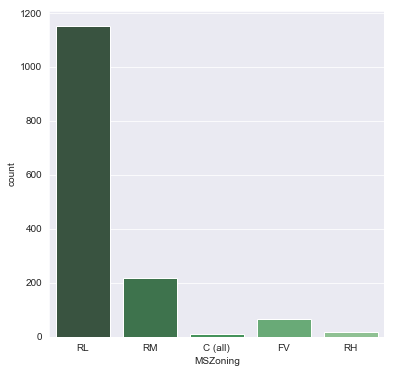

In [588]:
# MSZoning, Treat missing values to mode (treatment based on countplot)
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.countplot(x='MSZoning', data = train, palette="Greens_d")
train.loc[train.MSZoning.isnull(), 'MSZoning'] = train.loc[:, 'MSZoning'].mode()[0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB96DC9C18>,
      dtype=object)

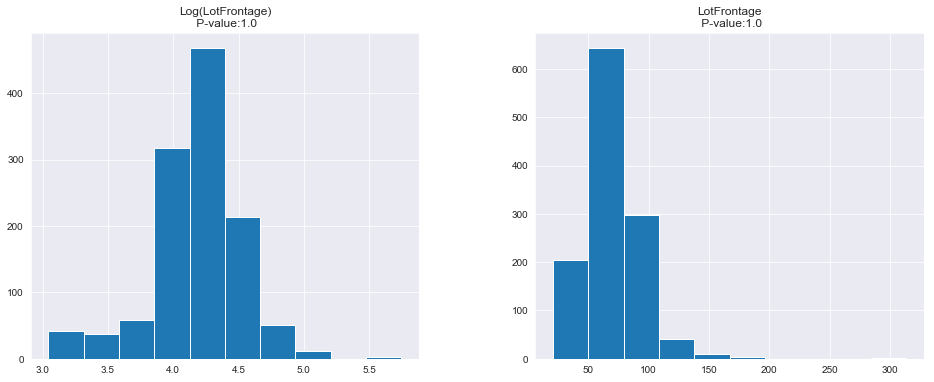

In [589]:
# Check distribution of prices and log(LotFrontage)
plt.rcParams['figure.figsize'] = (16.0, 6.0)
# Greater the p-value, greater is the normality in the distribution
pvalue_before = shapiro(train["LotFrontage"])[1]
pvalue_after = shapiro(np.log(train["LotFrontage"]))[1]
graph_data = pd.DataFrame(
        {
            ("LotFrontage\n P-value:" + str(pvalue_before)) : train["LotFrontage"],
            ("Log(LotFrontage)\n P-value:" + str(pvalue_after)) : np.log(train["LotFrontage"])
        }
    )
graph_data.hist()
# No improvement as detected by p-value. Let it be.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB9BBD2BA8>,
      dtype=object)

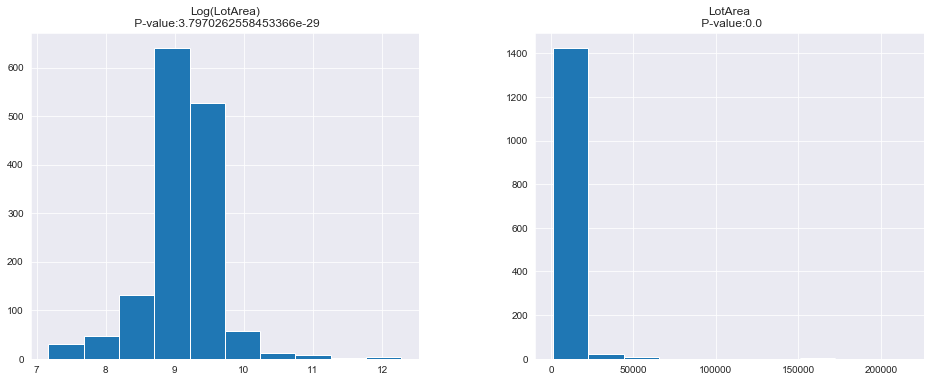

In [590]:
# Check distribution of prices and log(LotArea)
plt.rcParams['figure.figsize'] = (16.0, 6.0)
# Greater the p-value, greater is the normality in the distribution
pvalue_before = shapiro(train["LotArea"])[1]
pvalue_after = shapiro(np.log(train["LotArea"]))[1]
graph_data = pd.DataFrame(
        {
            ("LotArea\n P-value:" + str(pvalue_before)) : train["LotArea"],
            ("Log(LotArea)\n P-value:" + str(pvalue_after)) : np.log(train["LotArea"])
        }
    )
graph_data.hist()
# No improvement as detected by p-value. Let it be.

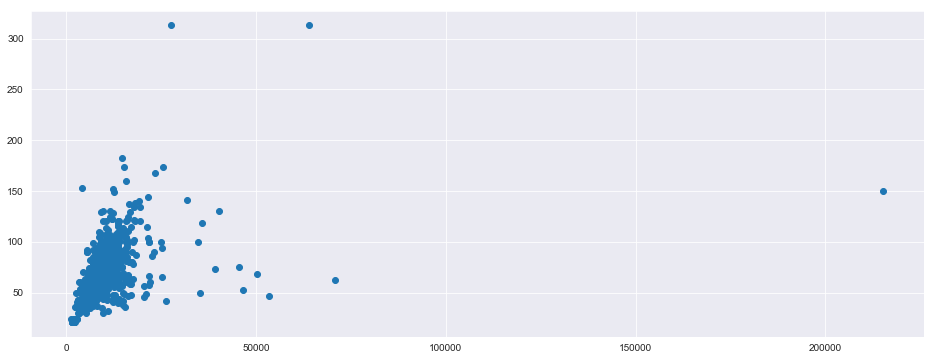

In [591]:
# We still have to do something about missing values of LotFrontage and LotArea
# For now filling them with zeros
# data.loc[data.LotFrontage.isnull(), "LotFrontage"] = 0
# data.loc[data.LotArea.isnull(), "LotArea"] = 0

# Trying polynomial fitting treatment
x = train.loc[np.logical_not(train["LotFrontage"].isnull()), "LotArea"]
y = train.loc[np.logical_not(train["LotFrontage"].isnull()), "LotFrontage"]

plt.scatter(x, y)

t = (x <= 25000) & (y <= 150)
p = np.polyfit(x[t], y[t], 1)
train.loc[train.LotFrontage.isnull(), 'LotFrontage'] = \
np.polyval(p, train.loc[train['LotFrontage'].isnull(), 'LotArea'])

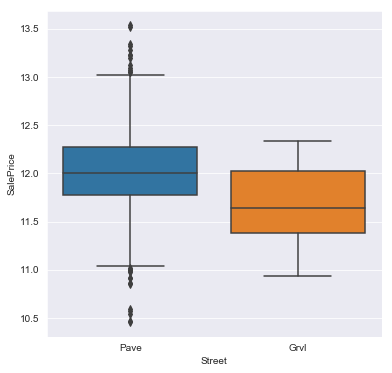

In [592]:
# Street, no missing values
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.boxplot(x='Street', y='SalePrice', data=train)
train = train.replace(
    {
        'Street': {'Pave': 1, 'Grvl': 0 }
    }
)

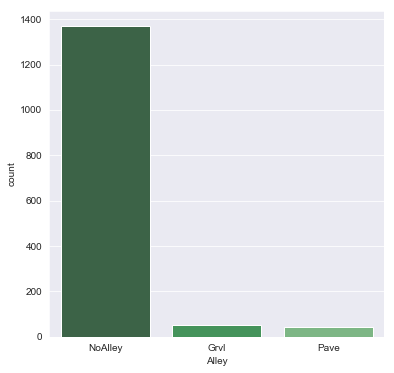

In [593]:
# Alley, can't use mode as shown below. Lot of missing values. So introduce NoAlley
train.loc[train.Alley.isnull(), 'Alley'] = 'NoAlley'
sns.countplot(x='Alley', data=train, palette="Greens_d")

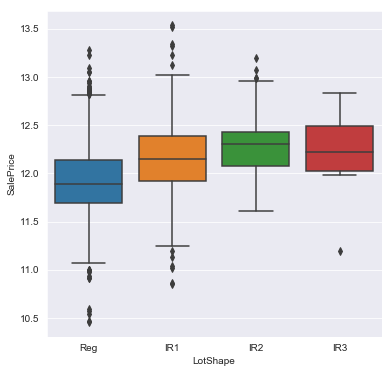

In [594]:
# LotShape, No missing values. Instead of ordering, prefer one hot encoding for this.
sns.boxplot(x='LotShape', y='SalePrice', data=train)

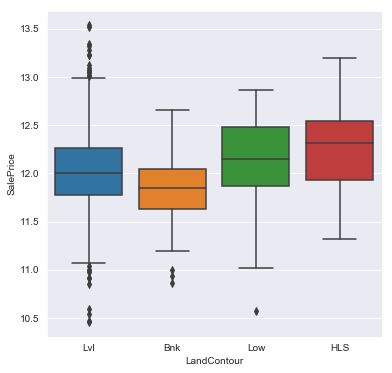

In [595]:
# LandContour, No missing values, Instead of ordering, prefer one hot encoding for this.
sns.boxplot(x='LandContour', y='SalePrice', data=train)

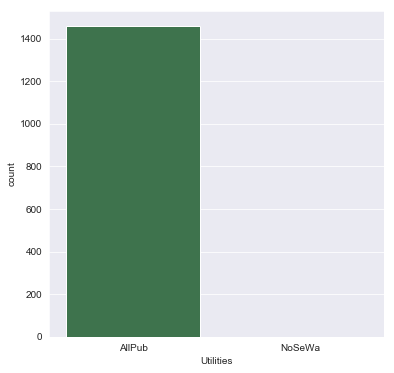

In [596]:
# Utilities. only 2 missing values. And mostly AllPub. Mode treatment. Ordering possible.
sns.countplot(x='Utilities', data= train, palette="Greens_d")
train.loc[train.Utilities.isnull(), 'Utilities'] = train.loc[:, 'Utilities'].mode()[0]
train = train.replace(
    {
        'Utilities': {
            'AllPub': 1,
            'NoSeWa': 0,
        }
    }
)

In [597]:
# LotConfig, LandSlope, no missing values.
train.loc[train.LotConfig.isnull(), 'LotConfig']

Series([], Name: LotConfig, dtype: object)

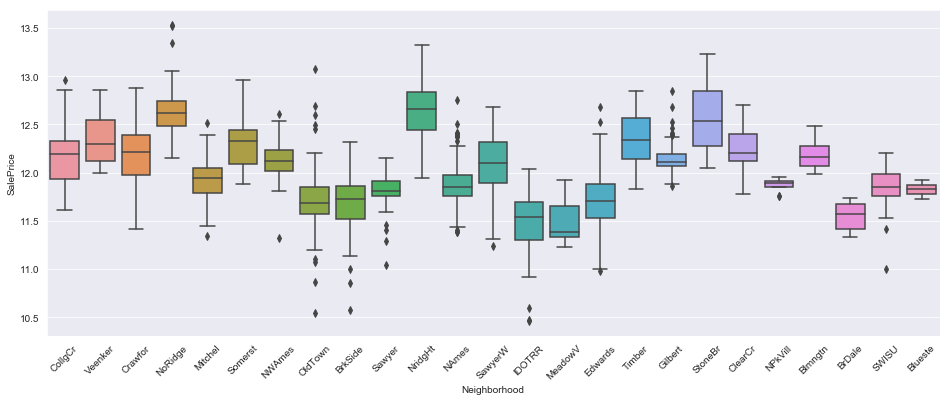

In [598]:
# Neighborhood, no missing values.
plt.figure(figsize = (16, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
xt = plt.xticks(rotation=45)

In [599]:
# Reward good neighborhoods, since it looks like an important feature.
NeighborhoodReward = pd.DataFrame(np.zeros((train.shape[0], 1)), columns=['NeighborhoodReward'])
NeighborhoodReward.loc[train.Neighborhood == 'StoneBr', 'NeighborhoodReward'] = 1
NeighborhoodReward.loc[train.Neighborhood == 'NridgHt', 'NeighborhoodReward'] = 1
NeighborhoodReward.loc[train.Neighborhood == 'NoRidge', 'NeighborhoodReward'] = 1
train['NeighborhoodReward'] = NeighborhoodReward

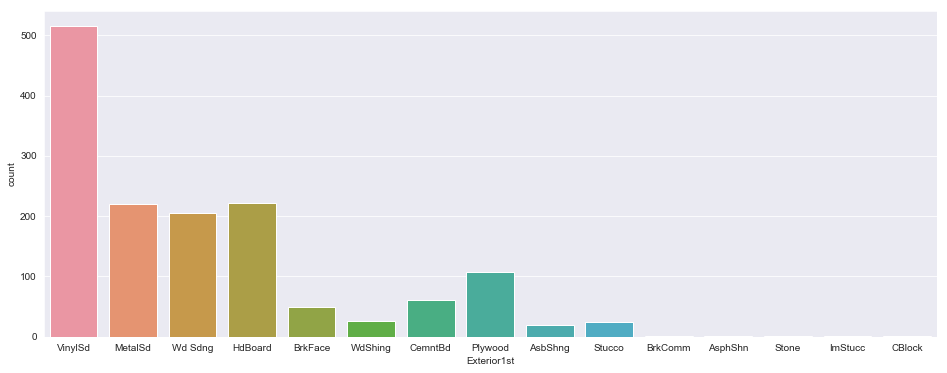

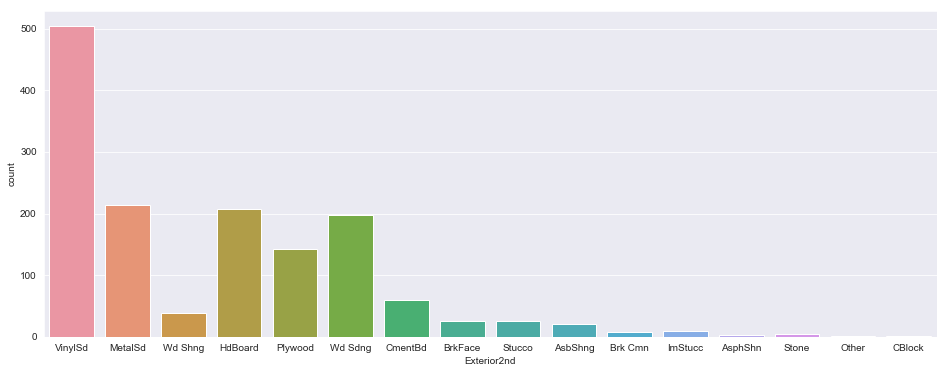

In [600]:
# Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond,
# YearBuilt, YearRemodAdd, RoofStyle, RoofMatl --- no missing values.
# For Exterior1st, Exterior2nd, Treat missing values to mode (treatment based on countplot)
plt.figure(figsize = (16, 6))
sns.countplot(x='Exterior1st', data=train)
plt.figure(figsize = (16, 6))
sns.countplot(x='Exterior2nd', data=train)
train.loc[train.Exterior1st.isnull(), 'Exterior1st'] = train.loc[:, 'Exterior1st'].mode()[0]
train.loc[train.Exterior2nd.isnull(), 'Exterior2nd'] = train.loc[:, 'Exterior2nd'].mode()[0]

In [601]:
# Check if house has been remodelled after buying.
IsRemodelled = pd.DataFrame(np.zeros((train.shape[0],1)), columns=['IsRemodelled'])
IsRemodelled[train.YrSold <= train.YearRemodAdd] = 1

# For memory efficiency
IsRemodelled = IsRemodelled.to_sparse()
train['IsRemodelled'] = IsRemodelled

In [602]:
# Check if house has been sold in the same year as it was built.
IsSameSoldBuilt = pd.DataFrame(np.zeros((train.shape[0],1)), columns=['IsSameSoldBuilt'])
IsSameSoldBuilt[train.YearBuilt >= train.YrSold] = 1

# For memory efficiency
IsSameSoldBuilt = IsSameSoldBuilt.to_sparse()
train['IsSameSoldBuilt'] = IsSameSoldBuilt

In [603]:
# To model inflation or change in trend of prices over time.
train.YrSold = train.loc[:, "YrSold"].max() - train.YrSold

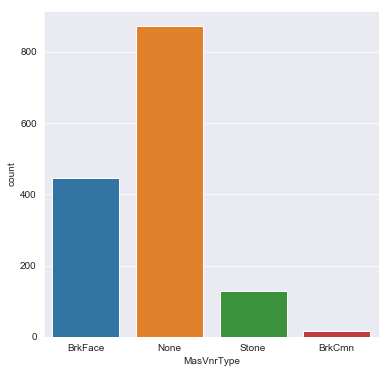

In [604]:
# MasVnrType, can't use mode as shown below. Lot of missing values. So introduce None
train.loc[train.MasVnrType.isnull(), 'MasVnrType'] = 'None'
plt.figure(figsize = (6, 6))
sns.countplot(x='MasVnrType', data=train)
# For null type, area is null too. making it zero makes sense
train.loc[train.MasVnrType == 'None', 'MasVnrArea'] = 0

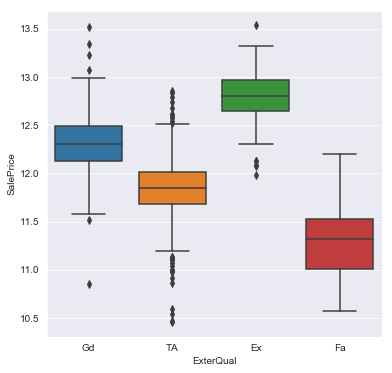

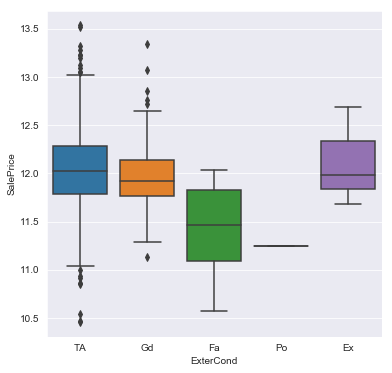

In [605]:
# ExterQual, ExterCond no missing values. Can order based on boxplots as well as meaning of domain.
plt.figure(figsize = (6, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=train)
plt.figure(figsize = (6, 6))
sns.boxplot(x='ExterCond', y='SalePrice', data=train)
train = train.replace(
    {
        'ExterQual': {'Ex': 5,
                      'Gd': 4,
                      'TA': 3,
                      'Fa': 2,
                      'Po': 1
                     },
        'ExterCond': {'Ex': 5,
                      'Gd': 4,
                      'TA': 3,
                      'Fa': 2,
                      'Po': 1
                     }
    }
)

In [606]:
# Foundation, no missing values
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2. Treat missing values to new values.
# BsmtFinSF1, BsmtUnfSF - no missing values.
# Ordering is possible.
# for categorical and zero for numerical.
train.loc[train.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
train.loc[train.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
train.loc[train.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
train.loc[train.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
train.loc[train.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
train.loc[train.BsmtFinType1 == 'NoBsmt', 'BsmtFinSF1'] = 0
train.loc[train.BsmtFinType2 == 'NoBsmt', 'BsmtFinSF2'] = 0
train.loc[train.BsmtQual == 'NoBsmt', 'BsmtUnfSF'] = 0
train.loc[train.BsmtQual == 'NoBsmt', 'TotalBsmtSF'] = 0
train= train.replace(
    {
        'BsmtExposure': {
            'Gd': 3,
            'Av': 2,
            'Mn': 1,
            'No': 0,
            'NoBsmt': 0
        },
        'BsmtCond': {
            'Ex': 5,
            'Gd': 4,
            'TA': 3,
            'Fa': 2,
            'Po': 1,
            'NoBsmt': 0
        },
    }
)

In [607]:
# Continuing in similar manner as above.
# Heating, HeatingQC, CentralAir, no missing values. Ordering possible for HeatingQC, CentralAir.
train = train.replace(
    {
        'HeatingQC': {
            'Ex': 5,
            'Gd': 4,
            'TA': 3,
            'Fa': 2,
            'Po': 1            
        },
        'CentralAir': {
            'Y': 1,
            'N': 0
        }
    }
)

In [608]:
# Electrical, Treat missing values to mode.
train.loc[train.Electrical.isnull(), 'Electrical'] = train.loc[:, 'Electrical'].mode()[0]

# 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, no missing values, numerical.

In [609]:
# BsmtFullBath, BsmtHalfBath. Treat missing values to 0
train.loc[train.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
train.loc[train.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0

# FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, no missing values

In [610]:
# KitchenQual, Treat missing value to mode. Ordering is possible.
train.loc[train.KitchenQual.isnull(), 'KitchenQual'] =train.loc[:, 'KitchenQual'].mode()[0]
train= train.replace(
    {
        'KitchenQual': {
            'Ex': 5,
            'Gd': 4,
            'TA': 3,
            'Fa': 2,
            'Po': 1
        }
    }
)

In [611]:
# Functional, Treat missing value to new value. Ordering is possible.
train.loc[train.Functional.isnull(), 'Functional'] = 'Typ'
train =train.replace(
    {
        'Functional': {
            'Typ': 0,
            'Min1': 1,
            'Min2': 1,
            'Mod': 2,
            'Maj1': 3,
            'Maj2': 4,
            'Sev': 5,
            'Sal': 6
            }
    }
)


In [612]:
# Fireplaces, no missing values

# FireplaceQu, Treat missing value to new value, and ordering is possible
train.loc[train.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
train = train.replace(
    {
        'FireplaceQu': {
            'Ex': 5,
            'Gd': 4,
            'TA': 3,
            'Fa': 2,
            'Po': 1,
            'NoFireplace': 0
        }
    }
)

In [613]:
# GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond.
# Treat missing value to new value, and
# ordering is possible for GarageQual, GarageCond
train.loc[train.GarageType.isnull(), 'GarageType'] = 'NoGarage'
train.loc[train.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
train.loc[train.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
train.loc[train.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
train.loc[train.GarageYrBlt.isnull(), 'GarageYrBlt'] = 'NoGarage'
train = train.replace(
    {
        'GarageQual': {
            'Ex': 5,
            'Gd': 4,
            'TA': 3,
            'Fa': 2,
            'Po': 1,
            'NoGarage': 0
        },
        'GarageCond': {
            'Ex': 5,
            'Gd': 4,
            'TA': 3,
            'Fa': 2,
            'Po': 1,
            'NoGarage': 0
        },
    }
)

In [614]:
# Continuing in similar manner as above.

# PavedDrive, no missing value, ordering is possible, based on boxplot
train = train.replace(
    {
        'PavedDrive': {
            'Y': 1,
            'P': 0.5,
            'N': 0
        }
    }
)

In [615]:
# PoolQC, Fence, Treat missing values to new value. ordering is possible, based on boxplot and meaning of domain.
train.loc[train['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
train.loc[train['Fence'].isnull(), 'Fence'] = 'NoFence'
train = train.replace(
    {
        'PoolQC': {
            'Ex': 5,
            'Gd': 4,
            'TA': 3,
            'Fa': 2,
            'Po': 1,
        },
        'Fence': {
            'GdPrv': 2,
            'MnPrv': 1,
            'GdWo': 2,
            'MnWw': 1,
            'NoFence': 0
        }
    }
)



In [616]:
# MiscFeature, Treat missing values to new value. Will prefer one-hot encoding for this.
train.loc[train['MiscFeature'].isnull(), 'MiscFeature'] = 'None'
#SaleType, Fix missing value to mode.
train.loc[train['SaleType'].isnull(), 'SaleType'] = train.loc[:, 'SaleType'].mode()[0]


In [617]:
#SaleType, Fix missing value to mode.
train.loc[train['SaleType'].isnull(), 'SaleType'] = train.loc[:, 'SaleType'].mode()[0]

In [618]:
# GarageCars, GarageArea. Numerical. Only one missing value whose GarageType is Detchd.
# Treat missing value to median (for cars as we want whole number) and
# mean (for GarageArea as it is double), of its garage type.
train.loc[train['GarageCars'].isnull(), 'GarageCars'] = train.loc[train.GarageType == 'Detchd', 'GarageCars'].median()
train.loc[train['GarageArea'].isnull(), 'GarageArea'] = train.loc[train.GarageType == 'Detchd', 'GarageArea'].mean()

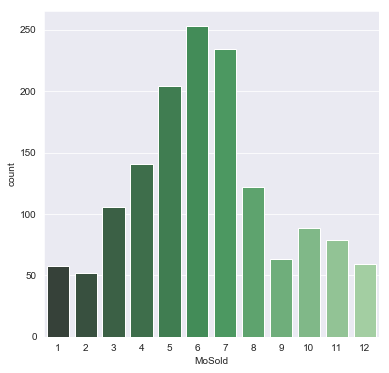

In [619]:
# Months with the maximum number of deals may be significant
sns.countplot(x='MoSold', data= train, palette="Greens_d")
SellingSeason = train.MoSold.replace(
    {
        1: 0,
        2: 0,
        3: 0,
        4: 1,
        5: 1,
        6: 1,
        7: 1,
        8: 0,
        9: 0,
        10: 0,
        11: 0,
        12: 0
    }
)
train['SellingSeason'] = SellingSeason

In [620]:
# Number of month should not be taken numerical but categorical
train = train.replace(
    {
        'MoSold': {
            1: 'Jan',
            2: 'Feb',
            3: 'Mar',
            4: 'Apr',
            5: 'May', 
            6: 'Jun',
            7: 'Jul',
            8: 'Aug',
            9: 'Sep',
            10: 'Oct',
            11: 'Nov',
            12: 'Dec'
        }
    }
)

In [621]:
# Reward good qualities and penalise bad qualities, for quality based fatures.

# OverallQual
IsOverallQualPoor = train.OverallQual.copy()
IsOverallQualPoor[IsOverallQualPoor <= 5] = 1
IsOverallQualPoor[IsOverallQualPoor > 5] = 0
train['IsOverallQualPoor'] = IsOverallQualPoor

IsOverallQualGood = train.OverallQual.copy()
IsOverallQualGood[IsOverallQualGood <= 5] = 0
IsOverallQualGood[IsOverallQualGood > 5] = 1
train['IsOverallQualGood'] = IsOverallQualGood

# OverallCond
IsOverallCondPoor = train.OverallCond.copy()
IsOverallCondPoor[IsOverallCondPoor <= 5] = 1
IsOverallCondPoor[IsOverallCondPoor > 5] = 0
train['IsOverallCondPoor'] = IsOverallCondPoor

IsOverallCondGood = train.OverallCond.copy()
IsOverallCondGood[IsOverallCondGood <= 5] = 0
IsOverallCondGood[IsOverallCondGood > 5] = 1
train['IsOverallCondGood'] = IsOverallCondGood

# ExterQual
IsExterQualPoor = train.ExterQual.copy()
IsExterQualPoor[IsExterQualPoor <= 2] = 1
IsExterQualPoor[IsExterQualPoor > 2] = 0
train['IsExterQualPoor'] = IsExterQualPoor

IsExterQualGood = train.ExterQual.copy()
IsExterQualGood[IsExterQualGood <= 2] = 0
IsExterQualGood[IsExterQualGood > 2] = 1
train['IsExterQualGood'] = IsExterQualGood

# ExterCond
IsExterCondPoor = train.ExterCond.copy()
IsExterCondPoor[IsExterCondPoor <= 2] = 1
IsExterCondPoor[IsExterCondPoor > 2] = 0
train['IsExterCondPoor'] = IsExterCondPoor

IsExterCondGood = train.ExterCond.copy()
IsExterCondGood[IsExterCondGood <= 2] = 0
IsExterCondGood[IsExterCondGood > 2] = 1
train['IsExterCondGood'] = IsExterCondGood


In [622]:
# BsmtCond
IsBsmtCondPoor =train.BsmtCond.copy()
IsBsmtCondPoor[IsBsmtCondPoor <= 3] = 1
IsBsmtCondPoor[IsBsmtCondPoor > 3] = 0
train['IsBsmtCondPoor'] = IsBsmtCondPoor

IsBsmtCondGood =train.BsmtCond.copy()
IsBsmtCondGood[IsBsmtCondGood <= 3] = 0
IsBsmtCondGood[IsBsmtCondGood > 3] = 1
train['IsBsmtCondGood'] = IsBsmtCondGood

# GarageQual
IsGarageQualPoor = train.GarageQual.copy()
IsGarageQualPoor[IsGarageQualPoor <= 3] = 1
IsGarageQualPoor[IsGarageQualPoor > 3] = 0
train['IsGarageQualPoor'] = IsGarageQualPoor

IsGarageQualGood = train.GarageQual.copy()
IsGarageQualGood[IsGarageQualGood <= 3] = 0
IsGarageQualGood[IsGarageQualGood > 3] = 1
train['IsGarageQualGood'] = IsGarageQualGood

# GarageCond
IsGarageCondPoor = train.GarageCond.copy()
IsGarageCondPoor[IsGarageCondPoor <= 3] = 1
IsGarageCondPoor[IsGarageCondPoor > 3] = 0
train['IsGarageCondPoor'] = IsGarageCondPoor

IsGarageCondGood = train.GarageCond.copy()
IsGarageCondGood[IsGarageCondGood <= 3] = 0
IsGarageCondGood[IsGarageCondGood > 3] = 1
train['IsGarageCondGood'] = IsGarageCondGood

# KitchenQual
IsKitchenQualPoor = train.KitchenQual.copy()
IsKitchenQualPoor[IsKitchenQualPoor <= 2] = 1
IsKitchenQualPoor[IsKitchenQualPoor > 2] = 0
train['IsKitchenQualPoor'] = IsKitchenQualPoor

IsKitchenQualGood = train.KitchenQual.copy()
IsKitchenQualGood[IsKitchenQualGood <= 2] = 0
IsKitchenQualGood[IsKitchenQualGood > 2] = 1
train['IsKitchenQualGood'] = IsKitchenQualGood

# HeatingQC
IsHeatingQCPoor = train.HeatingQC.copy()
IsHeatingQCPoor[IsHeatingQCPoor <= 2] = 1
IsHeatingQCPoor[IsHeatingQCPoor > 2] = 0
train['IsHeatingQCPoor'] = IsHeatingQCPoor

# Reward if any MasVnr is present.
IsMasVnrTypePresent = train.MasVnrType.copy()
IsMasVnrTypePresent[IsMasVnrTypePresent == "None"] = 0
IsMasVnrTypePresent[IsMasVnrTypePresent != 0] = 1
train['IsMasVnrTypePresent'] = IsMasVnrTypePresent

# Penalise bad SaleCondition
IsSaleConditionPoor =train.SaleCondition.copy()
IsSaleConditionPoor[IsSaleConditionPoor == "Normal"] = 0
IsSaleConditionPoor[IsSaleConditionPoor == "Partial"] = 0
IsSaleConditionPoor[IsSaleConditionPoor == "Abnorml"] = 1
IsSaleConditionPoor[IsSaleConditionPoor == "Alloca"] = 1
IsSaleConditionPoor[IsSaleConditionPoor == "AdjLand"] = 1
IsSaleConditionPoor[IsSaleConditionPoor == "Family"] = 1
train['IsSaleConditionPoor'] = IsSaleConditionPoor

In [623]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = True, inplace = True)
print(corr.SalePrice)

IsOverallQualPoor    -0.606485
IsKitchenQualPoor    -0.215516
IsOverallCondGood    -0.209611
IsExterCondPoor      -0.205394
IsHeatingQCPoor      -0.184996
IsExterQualPoor      -0.177297
Fence                -0.149595
EnclosedPorch        -0.149050
KitchenAbvGr         -0.147548
Functional           -0.136849
IsBsmtCondPoor       -0.106076
IsGarageQualPoor     -0.051140
SellingSeason        -0.041521
LowQualFinSF         -0.037963
OverallCond          -0.036868
MiscVal              -0.020021
Id                   -0.017942
IsGarageCondGood     -0.007017
BsmtHalfBath         -0.005149
BsmtFinSF2            0.002124
IsGarageCondPoor      0.007017
Utilities             0.012632
YrSold                0.037263
ExterCond             0.049314
IsGarageQualGood      0.051140
3SsnPorch             0.054900
Street                0.057369
PoolArea              0.069798
IsBsmtCondGood        0.106076
ScreenPorch           0.121208
                        ...   
IsRemodelled          0.306135
HalfBath

In [624]:
# Find most important features relative to target
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr

Id  LotFrontage   LotArea    Street  Utilities  \
SalePrice          -0.017942     0.274804  0.257320  0.057369   0.012632   
OverallQual        -0.028365     0.127071  0.105806  0.058823   0.001881   
GrLivArea           0.008273     0.293119  0.263116  0.044121   0.008545   
GarageCars          0.016570     0.198874  0.154871 -0.020025  -0.008161   
ExterQual           0.005039     0.088459  0.055570  0.100247   0.018054   
KitchenQual         0.014973     0.102031  0.067864  0.065669  -0.019268   
GarageArea          0.017634     0.236806  0.180403 -0.047794  -0.006372   
TotalBsmtSF        -0.015415     0.285868  0.260833  0.005068   0.014233   
IsOverallQualGood  -0.024404     0.061832  0.055067  0.061900  -0.019999   
1stFlrSF            0.010496     0.346176  0.299475  0.005950  -0.012287   
FullBath            0.005587     0.149757  0.126031  0.046471   0.026862   
YearBuilt          -0.012713     0.051636  0.014228  0.021137   0.011505   
YearRemodAdd       -0.021998     0.037255  0.013788  0.065465   0.034080   
FireplaceQu         0.001760     0.192694  0.185332  0.023374  -0.031450   
TotRmsAbvGrd        0.027239     0.233369  0.190015  0.046828  -0.007769   
NeighborhoodReward -0.040182     0.076841  0.042548  0.021167   0.008627   
Fireplaces         -0.019772     0.264373  0.271364 -0.005348  -0.015721   
HeatingQC          -0.015001     0.039476  0.003581  0.043211   0.003963   
IsMSSubClassGood   -0.030875     0.157803  0.096509  0.039706  -0.019999   
MasVnrArea         -0.054324     0.142732  0.104378  0.016896  -0.063615   
BsmtFinSF1         -0.005024     0.201960  0.214103 -0.015643   0.019100   
GarageQual          0.013912     0.091642  0.079313  0.027581  -0.006873   
GarageCond          0.008607     0.087218  0.076097  0.027582  -0.006954   
CentralAir          0.009821     0.060604  0.049755  0.069869  -0.006907   
BsmtExposure        0.017463     0.203842  0.232300 -0.093411   0.016537   
WoodDeckSF         -0.029643     0.143128  0.171698 -0.017990   0.019692   
OpenPorchSF        -0.000477     0.109720  0.084774 -0.005664  -0.028199   
2ndFlrSF            0.005590     0.044358  0.050986  0.046983   0.020818   
HalfBath            0.006784     0.008822  0.014259  0.027628   0.019939   
IsRemodelled        0.013246     0.051056  0.022018  0.019657   0.008011   
...                      ...          ...       ...       ...        ...   
ScreenPorch         0.001330     0.014895  0.043160 -0.033160  -0.102365   
IsBsmtCondGood      0.000445    -0.000332  0.014788  0.013866   0.005651   
PoolArea            0.057044     0.122089  0.077672  0.004413   0.001798   
Street              0.008916    -0.205653 -0.197131  1.000000  -0.001682   
3SsnPorch          -0.046635     0.051445  0.020423  0.007473   0.003046   
IsGarageQualGood    0.007097     0.005129  0.010289  0.006972   0.002842   
ExterCond           0.029860     0.007421  0.014732 -0.015212   0.006234   
YrSold             -0.000712     0.004807  0.014261  0.025043   0.023353   
Utilities          -0.013324    -0.012183 -0.010123 -0.001682   1.000000   
IsGarageCondPoor   -0.000085     0.004099  0.009687 -0.005597  -0.002281   
BsmtFinSF2         -0.004059     0.054932  0.111413 -0.038712  -0.050088   
BsmtHalfBath       -0.020155     0.057302  0.048046  0.015485  -0.103380   
IsGarageCondGood    0.000085    -0.004099 -0.009687  0.005597   0.002281   
Id                  1.000000    -0.015009 -0.033226  0.008916  -0.013324   
MiscVal            -0.006242     0.043651  0.038068 -0.022733   0.002296   
OverallCond         0.012609    -0.012166 -0.005636  0.042848  -0.009994   
LowQualFinSF       -0.044230     0.017224  0.004779  0.007724   0.003148   
SellingSeason      -0.005324    -0.021557 -0.013357 -0.012560   0.030134   
IsGarageQualPoor   -0.007097    -0.005129 -0.010289 -0.006972  -0.002842   
IsBsmtCondPoor     -0.000445     0.000332 -0.014788 -0.013866  -0.005651   
Functional         -0.004147     0.008351  0.024708  0.014814   0.006037  

In [625]:
# Based on this, Create new features
# x^2, x^3, sq(x) Polynomials on the top 10 existing features
# OverallQual      0.819240
# GrLivArea        0.718844
# GarageCars       0.680408
# GarageArea       0.655211
# TotalBsmtSF      0.641553
# 1stFlrSF         0.613742
# FullBath         0.590919
# YearBuilt        0.588977
# YearRemodAdd     0.568986
# GarageYrBlt      0.544005
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])

train["GrLivArea-s2"] = train["GrLivArea"] ** 2
train["GrLivArea-s3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])

train["GarageCars-s2"] = train["GarageCars"] ** 2
train["GarageCars-s3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])

train["GarageArea-s2"] = train["GarageArea"] ** 2
train["GarageArea-s3"] = train["GarageArea"] ** 3
train["GarageArea-Sq"] = np.sqrt(train["GarageArea"])

train["TotalBsmtSF-s2"] = train["TotalBsmtSF"] ** 2
train["TotalBsmtSF-s3"] = train["TotalBsmtSF"] ** 3
train["TotalBsmtSF-Sq"] = np.sqrt(train["TotalBsmtSF"])

train["1stFlrSF-s2"] = train["1stFlrSF"] ** 2
train["1stFlrSF-s3"] = train["1stFlrSF"] ** 3
train["1stFlrSF-Sq"] = np.sqrt(train["1stFlrSF"])

train["FullBath-s2"] = train["FullBath"] ** 2
train["FullBath-s3"] = train["FullBath"] ** 3
train["FullBath-Sq"] = np.sqrt(train["FullBath"])

train["YearBuilt-s2"] = train["YearBuilt"] ** 2
train["YearBuilt-s3"] = train["YearBuilt"] ** 3
train["YearBuilt-Sq"] = np.sqrt(train["YearBuilt"])

train["YearRemodAdd-s2"] = train["YearRemodAdd"] ** 2
train["YearRemodAdd-s3"] = train["YearRemodAdd"] ** 3
train["YearRemodAdd-Sq"] = np.sqrt(train["YearRemodAdd"])


In [626]:
# Translate years to year groups, making them categorical
year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871 + i*20, 1891 + i*20)) for i in range(0, 7))
train.GarageYrBlt = train.GarageYrBlt.map(year_map)
train.YearBuilt = train.YearBuilt.map(year_map)
train.YearRemodAdd = train.YearRemodAdd.map(year_map)

In [627]:
# Skipping Normalisation/scaling of numerical data for now
# Tried it but it decreased accuracy

numeric_features = train.dtypes[train.dtypes != "object"].index

# log transform skewed numeric features
skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 0.2]
skewed_features = skewed_features.index
train[skewed_features] = np.log1p(train[skewed_features])

In [628]:
# One hot encoding for remaining categorical features
train_processed = pd.get_dummies(train)

In [629]:
train.shape

(1460, 132)

In [630]:
train_processed.shape

(1460, 344)

In [631]:
# Drop any features which are too overfitted to training data. 
# According to validation, doesn't improve anything
train_processed = train_processed.drop('RoofMatl_ClyTile', axis=1) # only one is not zero
train_processed =train_processed.drop('Condition2_PosN', axis=1) # only two is not zero
train_processed =train_processed.drop('MSZoning_C (all)', axis=1)
train_processed = train_processed.drop('MSSubClass_MSSubClass_160', axis=1)

In [632]:
def poly(X):
    areas = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'BsmtUnfSF']

    qualities = chain(
        ['IsOverallQualPoor', 'IsOverallQualGood', 'IsOverallCondPoor', 'IsOverallCondGood',
         'IsExterQualPoor', 'IsExterQualGood', 'IsExterCondPoor', 'IsExterCondGood',
         'IsBsmtCondPoor', 'IsBsmtCondGood', 'IsGarageQualPoor', 'IsGarageQualGood',
         'IsGarageCondPoor', 'IsGarageCondGood', 'IsKitchenQualPoor', 'IsKitchenQualGood'
        ],
        
        ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'GarageQual',
         'GarageCond', 'KitchenQual', 'HeatingQC', 'IsHeatingQCPoor', 'IsMasVnrTypePresent',
         'IsSaleConditionPoor', 'IsRemodelled', 'IsSameSoldBuilt'
        ]
    )
    for area, quality in product(areas, qualities):
        temp = X.loc[:, [area, quality]].prod(1)
        temp.name = area + '_' + quality
        yield temp

train_temp = pd.concat(poly(train_processed), axis=1)
train_processed = pd.concat((train_processed, train_temp), axis=1)

In [633]:
train_processed.shape

(1460, 490)

In [634]:
# Removing the original catagorial variables 
train_processed = train_processed.drop(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'GarageQual',
         'GarageCond', 'KitchenQual', 'HeatingQC'], axis=1)

In [635]:
#Checking the Percentages of Null values
round(100*(train_processed.isnull().sum()/len(train_processed.index)),2)

Id                               0.0
LotFrontage                      0.0
LotArea                          0.0
Street                           0.0
Utilities                        0.0
MasVnrArea                       0.0
BsmtExposure                     0.0
BsmtFinSF1                       0.0
BsmtFinSF2                       0.0
BsmtUnfSF                        0.0
TotalBsmtSF                      0.0
CentralAir                       0.0
1stFlrSF                         0.0
2ndFlrSF                         0.0
LowQualFinSF                     0.0
GrLivArea                        0.0
BsmtFullBath                     0.0
BsmtHalfBath                     0.0
FullBath                         0.0
HalfBath                         0.0
BedroomAbvGr                     0.0
KitchenAbvGr                     0.0
TotRmsAbvGrd                     0.0
Functional                       0.0
Fireplaces                       0.0
FireplaceQu                      0.0
GarageCars                       0.0
G

In [636]:
train_processed.head(5)

Id  LotFrontage   LotArea  Street  Utilities  MasVnrArea  BsmtExposure  \
0   1     4.189655  9.042040       1          1    5.283204      0.000000   
1   2     4.394449  9.169623       1          1    0.000000      1.386294   
2   3     4.234107  9.328212       1          1    5.093750      0.693147   
3   4     4.110874  9.164401       1          1    0.000000      0.000000   
4   5     4.442651  9.565284       1          1    5.860786      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF            ...              \
0    6.561031         0.0   5.017280            ...               
1    6.886532         0.0   5.652489            ...               
2    6.188264         0.0   6.075346            ...               
3    5.379897         0.0   6.293419            ...               
4    6.486161         0.0   6.196444            ...               

   BsmtUnfSF_BsmtCond  BsmtUnfSF_GarageQual  BsmtUnfSF_GarageCond  \
0           15.051840             15.051840             15.051840   
1           16.957468             16.957468             16.957468   
2           18.226038             18.226038             18.226038   
3           25.173677             18.880258             18.880258   
4           18.589332             18.589332             18.589332   

   BsmtUnfSF_KitchenQual  BsmtUnfSF_HeatingQC  BsmtUnfSF_IsHeatingQCPoor  \
0               8.075000            25.086399                        0.0   
1               7.836014            28.262446                        0.0   
2               9.777892            30.376730                        0.0   
3              10.128868            25.173677                        0.0   
4               9.972792            30.982221                        0.0   

   BsmtUnfSF_IsMasVnrTypePresent  BsmtUnfSF_IsSaleConditionPoor  \
0                       5.017280                       5.017280   
1                       5.652489                       5.652489   
2                       6.075346                       6.075346   
3                       6.293419                       6.293419   
4                       6.196444                       6.196444   

   BsmtUnfSF_IsRemodelled  BsmtUnfSF_IsSameSoldBuilt  
0                     0.0                        0.0  
1                     0.0                        0.0  
2                     0.0                        0.0  
3                     0.0                        0.0  
4                     0.0                        0.0  

[5 rows x 481 columns]

In [637]:
print(train_processed.columns)

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'MasVnrArea',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'BsmtUnfSF_BsmtCond', 'BsmtUnfSF_GarageQual', 'BsmtUnfSF_GarageCond',
       'BsmtUnfSF_KitchenQual', 'BsmtUnfSF_HeatingQC',
       'BsmtUnfSF_IsHeatingQCPoor', 'BsmtUnfSF_IsMasVnrTypePresent',
       'BsmtUnfSF_IsSaleConditionPoor', 'BsmtUnfSF_IsRemodelled',
       'BsmtUnfSF_IsSameSoldBuilt'],
      dtype='object', length=481)


In [638]:
# Split into X and y
y = train_processed['SalePrice']
X = train_processed.drop(['SalePrice'], axis=1)


In [639]:
y.shape

(1460,)

In [640]:
X.shape

(1460, 480)

In [ ]:
# Scaling of features 
from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

In [ ]:
# Splitting into train and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

# Ridge Regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Ridge Regression
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

In [ ]:
# cross validation
nooffolds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = nooffolds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

In [642]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.041364      0.003559         0.000801    4.004053e-04      0.0001   
1       0.043175      0.003917         0.001200    3.997090e-04       0.001   
2       0.038777      0.002314         0.001000    8.313940e-07        0.01   
3       0.037977      0.002189         0.001001    5.722046e-07        0.05   
4       0.034523      0.009958         0.001000    6.321085e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.138328          -0.124007          -0.168781   
1   {'alpha': 0.001}          -0.129494          -0.122168          -0.166963   
2    {'alpha': 0.01}          -0.112207          -0.118424          -0.163894   
3    {'alpha': 0.05}          -0.104518          -0.114524          -0.155890   
4     {'alpha': 0.1}          -0.102749          -0.112257          -0.149791   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.142551       ...               -0.143210        0.014468   
1          -0.133449       ...               -0.140006        0.015886   
2          -0.115324       ...               -0.129352        0.019294   
3          -0.108362       ...               -0.121169        0.018400   
4          -0.105190       ...               -0.116929        0.017000   

   rank_test_score  split0_train_score  split1_train_score  \
0               28           -0.043379           -0.044333   
1               27           -0.043609           -0.044597   
2               26           -0.043921           -0.045214   
3               25           -0.044444           -0.045772   
4               24           -0.044831           -0.046148   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.043468           -0.044804           -0.045102   
1           -0.043499           -0.045147           -0.045252   
2           -0.043840           -0.046075           -0.045789   
3           -0.044205           -0.046526           -0.046516   
4           -0.044519           -0.046840           -0.047052   

   mean_train_score  std_train_score  
0         -0.044217         0.000694  
1         -0.044421         0.000743  
2         -0.044968         0.000930  
3         -0.045493         0.000995  
4         -0.045878         0.001031  

[5 rows x 21 columns]

In [643]:
model_cv.best_params_

{'alpha': 500}

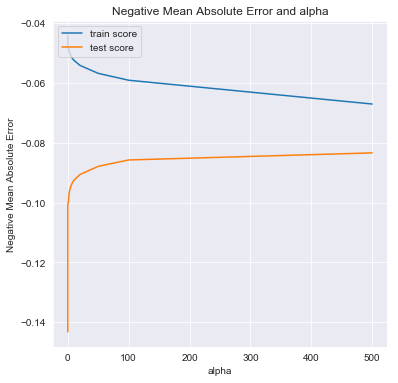

In [644]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [645]:
residual=np.subtract(y_test_pred,y_test)

In [646]:
rss=np.sum(np.power(residual,2))
rss

14.767233866419467

In [647]:
ridge = Ridge(alpha = 100)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.47620338e-03,  7.97520165e-04,  7.28797498e-03,  5.50685438e-03,
        2.89074390e-03,  5.22132129e-03,  1.15399615e-02,  1.42055388e-02,
       -1.65021995e-03, -2.21806959e-03,  2.38357794e-03,  1.12708484e-02,
        4.42824125e-03,  3.21984503e-03, -5.36560199e-03,  1.54418817e-02,
        1.51625557e-02, -8.96493886e-04,  3.97262261e-03,  7.18080393e-03,
       -2.36881432e-03, -1.39650256e-02,  6.74398554e-03, -1.88232031e-02,
        7.51813836e-03,  9.06783571e-03,  9.13174185e-03,  2.33810911e-04,
        6.22417404e-03,  8.18594016e-03,  3.50181161e-03,  1.68639306e-03,
        3.61719393e-03,  8.06572294e-03, -1.04226225e-02, -2.21971579e-03,
       -1.57254903e-03,  4.31798422e-03,  4.59293417e-03,  1.38158241e-02,
       -8.58347620e-04,  5.54830472e-03,  4.49625078e-03,  4.06488858e-03,
       -4.06488858e-03, -1.52755664e-03,  1.52755664e-03, -1.47970230e-04,
        1.47970230e-04, -1.22845590e-03,  1.22845590e-03, -2.19850578e-04,
        2.19850578e-04, -

## Lasso Regression

In [648]:
# Lasso Regression
lasso = Lasso()

In [649]:
# cross validation
nooffolds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = nooffolds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   10.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [650]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.041364      0.003559         0.000801    4.004053e-04      0.0001   
1       0.043175      0.003917         0.001200    3.997090e-04       0.001   
2       0.038777      0.002314         0.001000    8.313940e-07        0.01   
3       0.037977      0.002189         0.001001    5.722046e-07        0.05   
4       0.034523      0.009958         0.001000    6.321085e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.138328          -0.124007          -0.168781   
1   {'alpha': 0.001}          -0.129494          -0.122168          -0.166963   
2    {'alpha': 0.01}          -0.112207          -0.118424          -0.163894   
3    {'alpha': 0.05}          -0.104518          -0.114524          -0.155890   
4     {'alpha': 0.1}          -0.102749          -0.112257          -0.149791   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.142551       ...               -0.143210        0.014468   
1          -0.133449       ...               -0.140006        0.015886   
2          -0.115324       ...               -0.129352        0.019294   
3          -0.108362       ...               -0.121169        0.018400   
4          -0.105190       ...               -0.116929        0.017000   

   rank_test_score  split0_train_score  split1_train_score  \
0               28           -0.043379           -0.044333   
1               27           -0.043609           -0.044597   
2               26           -0.043921           -0.045214   
3               25           -0.044444           -0.045772   
4               24           -0.044831           -0.046148   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.043468           -0.044804           -0.045102   
1           -0.043499           -0.045147           -0.045252   
2           -0.043840           -0.046075           -0.045789   
3           -0.044205           -0.046526           -0.046516   
4           -0.044519           -0.046840           -0.047052   

   mean_train_score  std_train_score  
0         -0.044217         0.000694  
1         -0.044421         0.000743  
2         -0.044968         0.000930  
3         -0.045493         0.000995  
4         -0.045878         0.001031  

[5 rows x 21 columns]

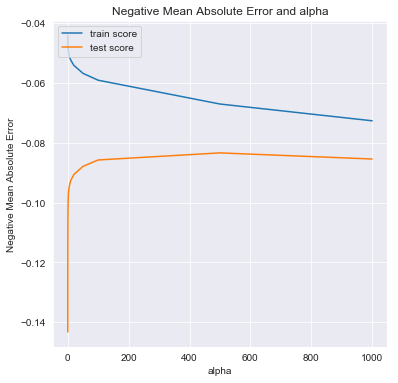

In [651]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [652]:
lasso_model_cv.best_params_

{'alpha': 0.001}

In [653]:
residual=np.subtract(y_test_pred,y_test)

In [654]:
rss=np.sum(np.power(residual,2))
rss

14.767233866419467

In [655]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [656]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  3.57156254e-03,  4.38623740e-03,
        1.20567404e-03,  5.93147793e-03,  1.14873488e-02,  2.03594959e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.07296528e-02,
        3.48146048e-04,  0.00000000e+00, -7.02666246e-03,  9.93347750e-02,
        1.53982995e-02, -0.00000000e+00,  0.00000000e+00,  4.72521110e-03,
       -2.26917936e-03, -1.61988805e-02,  0.00000000e+00, -2.02627223e-02,
        6.42716755e-03,  8.84591337e-03,  1.54695740e-02,  0.00000000e+00,
        4.78470506e-03,  7.77750313e-03,  7.82190893e-04,  0.00000000e+00,
        1.92576950e-03,  6.71291581e-03,  0.00000000e+00, -9.78763752e-04,
       -0.00000000e+00,  2.68937797e-03,  1.26143119e-03,  2.19772749e-02,
       -0.00000000e+00,  2.09070102e-03,  3.05351814e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -